
# Tech Frontiers - Regression Project

---

In [1]:
from scipy import stats
from math import isnan
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


---

### Multiple Linear Regression

There are two data sets on which to practice creating a multiple linear regression model. 

---

`Fish.csv`
This data file comes from kaggle.com: https://www.kaggle.com/aungpyaeap/fish-market

As stated on the linked page: "This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted."

**Response**:
- Weight (in grams)

**Features**:
- Length1 (vertical length in cm)
- Length2 (diagonal length in cm)
- Length3 (cross length in cm)
- Height (in cm)
- Width (diagonal width in cm)

The species name of the fish is also given. 

---

`housing_pricing.csv`
This data file was generated by Rachel Cox (so it is fake!). I did my best to generate realistic values for typical homes. 

**Response**: 
- sale price (in hundreds of thousands of dollar) - e.g. sale price = 2.479 means the selling price was $247,900

**Features**: 
- clouds - represents the proportion of the sky covered with clouds on a typical day. 1 indicates total cloud coverage, 0 would indicate no clouds
- distance to metro - distance in miles to the nearest big city
- num bathrooms 
- square footage
- lot acreage
- age of house - in years
- num bedrooms
- precipitation - monthly average precipitation in inche
- walkability - A number between 0 and 100 that indicates how pleasant it is to walk nearby (https://www.redfin.com/how-walk-score-works)
- temperature - Average yearly temperature

---

**Part A**: Read the data from the csv of your choosing into a Pandas DataFrame.  If you are reading in `Fish.csv`, I would recommend dropping the species column as it is non-numerical.

Also, make sure to re-order the columns so that the response variable is the last column.

In [2]:
file_path = "fish.csv"

dfFish = pd.read_csv(file_path)
dfFish.drop(columns=["Species"], inplace=True)
dfFish.head()

feature_names = ["Length1", "Length2", "Length3", "Height", "Width"]
dfFish = dfFish[feature_names + ['Weight']]

dfFish.head()

,Length1,Length2,Length3,Height,Width,Weight
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0


In [3]:
file_path = "house_pricing.csv"

dfHouse = pd.read_csv(file_path)
dfHouse.head()

,clouds,distance to metro,num bathrooms,square footage,lot acreage,age of house,num bedrooms,precipitation,walkability,temperature,sale price
0,1.00,5.71,5,2994.0,0.82,91.82,3.0,0.824059,62.29,78.0,2.479029
1,1.00,4.35,4,1878.0,0.99,19.72,2.0,0.993296,63.75,89.0,2.997719
2,1.00,4.51,4,2092.0,1.17,97.19,1.0,1.173342,62.36,65.0,0.391435
3,0.13,5.16,1,1513.0,0.92,34.55,3.0,0.919291,52.58,36.0,1.772153
4,1.00,3.86,3,2629.0,1.73,81.92,2.0,1.729127,59.72,72.0,1.944304


**Part B:** Make separate scatter plots for each feature versus the response. From these plots, we will try and make inferences about which features appear to have a relationship with the response variable.

With the `house_pricing.csv` data, it might be useful to rescale the "sale price" values by multiplying by 100,000.

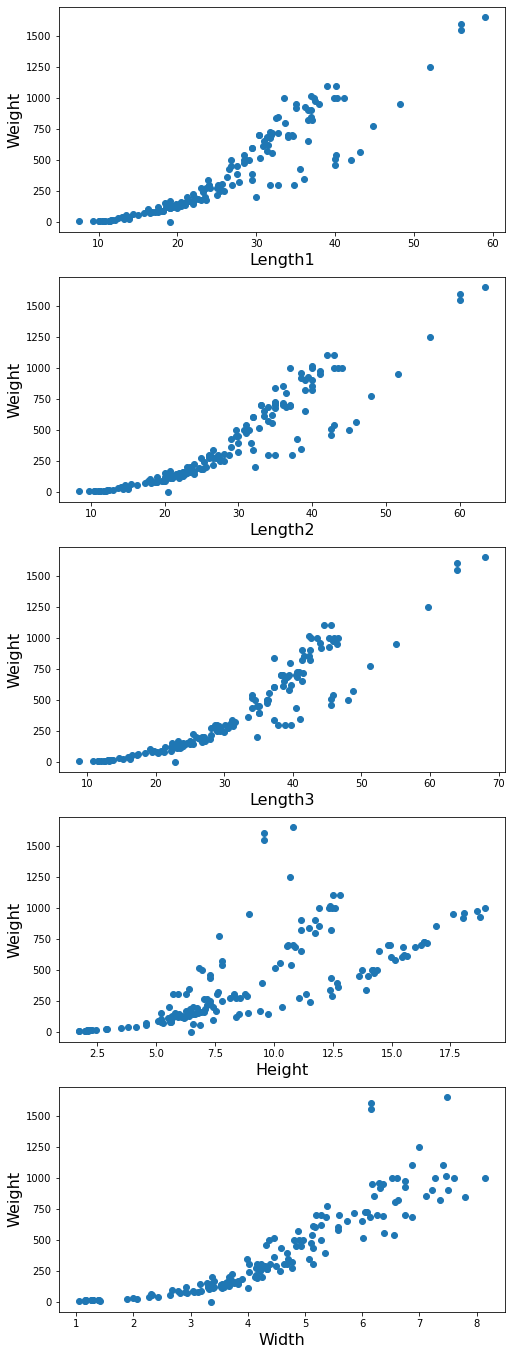

In [4]:
# First we generate the scatterplots for the Fish.csv data
fish_stats = ["Length1","Length2","Length3","Height","Width"]

fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(8,24))

axes = 0
for stat in fish_stats:
    ax[axes].scatter(dfFish[stat],dfFish["Weight"])
    ax[axes].set_xlabel(stat, fontsize=16)
    ax[axes].set_ylabel("Weight", fontsize=16)
    axes += 1

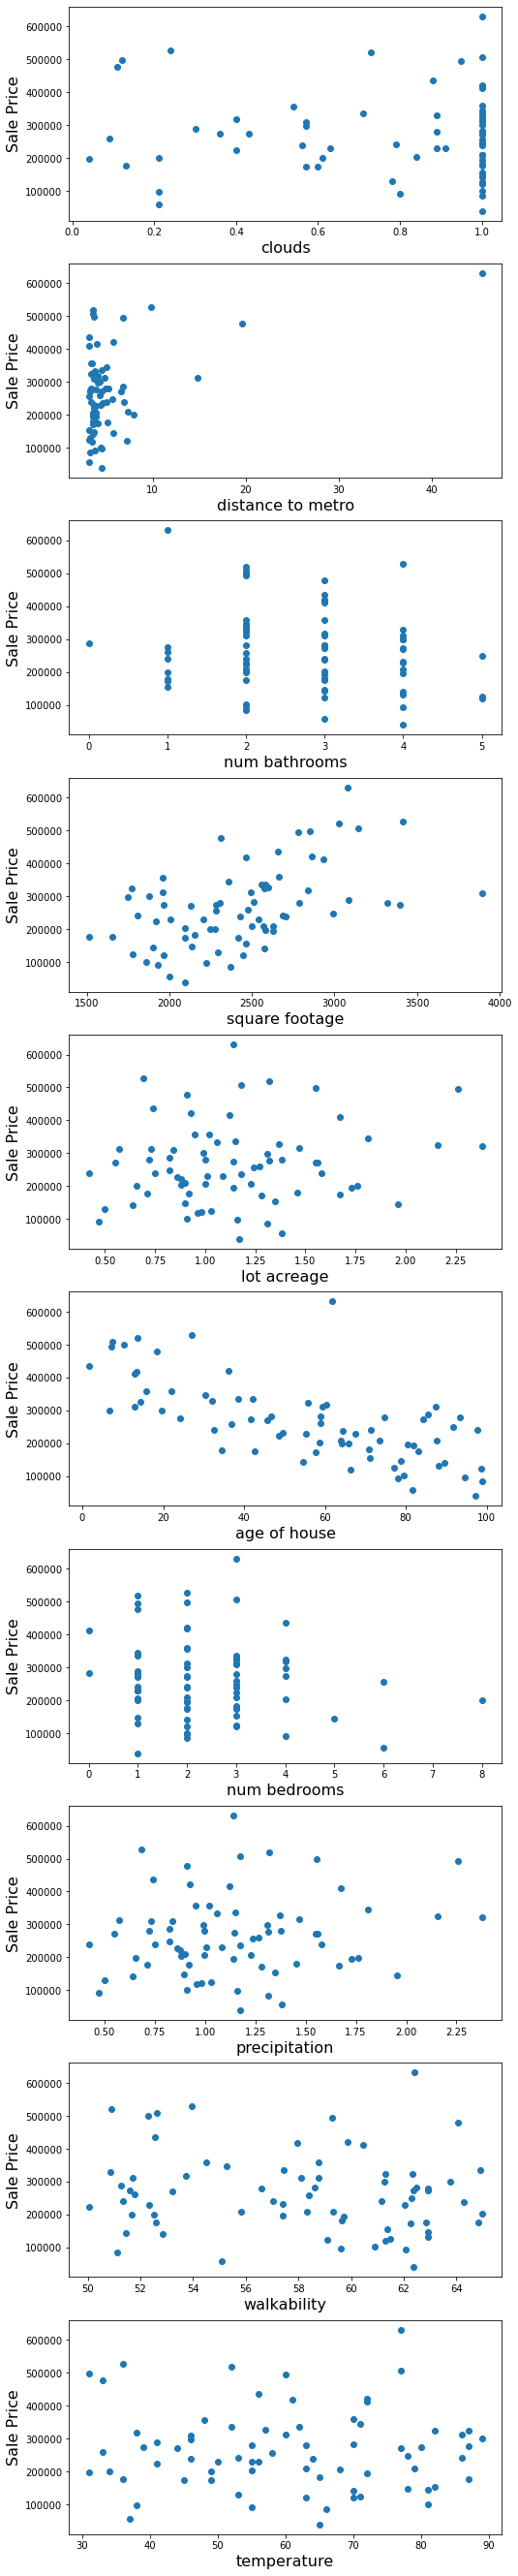

In [5]:
house_stats = ["clouds","distance to metro","num bathrooms","square footage","lot acreage","age of house","num bedrooms","precipitation","walkability","temperature"]

fig, ax = plt.subplots(nrows = 10, ncols=1, figsize=(8,48))

axes = 0
for stat in house_stats:
    ax[axes].scatter(dfHouse[stat],100000*dfHouse["sale price"])
    ax[axes].set_xlabel(stat, fontsize=16)
    ax[axes].set_ylabel("Sale Price", fontsize=16)
    axes += 1

**Part C:** Use stats.linregress to fit simple linear regression models to the data.

Further documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [6]:
fish_stats = ["Length1","Length2","Length3","Height","Width"]

for stat in fish_stats:
    beta1, beta0, rvalue, pvalue, stderr = stats.linregress(dfFish[stat],dfFish["Weight"])
    
    print("Simple Linear Regression for:",stat)
    print("------------------------------------")
    print("beta0:", beta0)
    print("beta1:", beta1)
    print("p-value:", pvalue)
    print("\n")

Simple Linear Regression for: Length1
------------------------------------
beta0: -462.3750791583142
beta1: 32.79216389575922
p-value: 4.7496197227693126e-64


Simple Linear Regression for: Length2
------------------------------------
beta0: -473.64900740680116
beta1: 30.686370858918878
p-value: 3.395113229031711e-65


Simple Linear Regression for: Length3
------------------------------------
beta0: -490.4005915891796
beta1: 28.460170804753087
p-value: 5.023191454303098e-67


Simple Linear Regression for: Height
------------------------------------
beta0: -144.38597115478774
beta1: 60.49635121272139
p-value: 3.84234183895186e-27


Simple Linear Regression for: Width
------------------------------------
beta0: -433.2588525217859
beta1: 188.24855477270563
p-value: 2.0381946411860803e-54




In [7]:
house_stats = ["clouds","distance to metro","num bathrooms","square footage","lot acreage","age of house","num bedrooms","precipitation","walkability","temperature"]
for hstat in house_stats:
    beta1, beta0, rvalue, pvalue, stderr = stats.linregress(dfHouse[hstat],100000*dfHouse["sale price"])
    
    print("Simple Linear Regression for:",hstat)
    print("------------------------------------")
    print("beta0:", beta0)
    print("beta1:", beta1)
    print("p-value:", pvalue)
    print("\n")

Simple Linear Regression for: clouds
------------------------------------
beta0: 279342.0532492804
beta1: -18397.36639319819
p-value: 0.7002322385590103


Simple Linear Regression for: distance to metro
------------------------------------
beta0: 213429.53359222054
beta1: 9755.558217900767
p-value: 0.00014849044678292127


Simple Linear Regression for: num bathrooms
------------------------------------
beta0: 316411.71872297744
beta1: -18966.83352548492
p-value: 0.1543025107365568


Simple Linear Regression for: square footage
------------------------------------
beta0: -67112.13218041643
beta1: 136.93049451237204
p-value: 3.4714152585631935e-06


Simple Linear Regression for: lot acreage
------------------------------------
beta0: 216958.4736103029
beta1: 41954.69111297878
p-value: 0.2339926659292471


Simple Linear Regression for: age of house
------------------------------------
beta0: 430843.6231555752
beta1: -3017.112918187299
p-value: 1.1149482941856013e-11


Simple Linear Regres

**Part D:** Now, let's fit a multiiple linear regression model! We will uses statsmodels for this task. Execute the following cell to import the required package. Use sm.OLS.fit to accomplish this. Then use model.params to print the regression coeficients to the screen.

Further documentation: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

In [8]:
import statsmodels.api as sm

In [9]:
# First we have the MLR coefficients for the Fish.csv data

X = dfFish[fish_stats]

X = sm.add_constant(X)

y = dfFish["Weight"]

model = sm.OLS(y,X).fit()

In [10]:
print(model.params)

const     -499.586955
Length1     62.355214
Length2     -6.526752
Length3    -29.026219
Height      28.297351
Width       22.473307
dtype: float64


Using the parameters above, our MLR for the fish.csv data is:
$$ \texttt{Weight} = -499.587 + 62.355 \times \texttt{Length1} -6.527 \times \texttt{Length2} - 29.026 \times \texttt{Length3} + 28.297 \times \texttt{Height} + 22.473 \times \texttt{Width} $$

**Part E**: 
Based on your MLR Model in **Part D**, use the full model to predict the fish weight when the following features are observed: 

- $\texttt{Length1}$: 26 cm
- $\texttt{Length2}$: 28 cm
- $\texttt{Length3}$: 31 cm
- $\texttt{Height}$: 9 cm
- $\texttt{Width}$: 4 cm

In [11]:
print("Predicted Weight:", -499.587+62.355*26-6.527*28-29.026*31+28.297*9+22.473*4)

Predicted Weight: 383.646


In [12]:
print("Mean Fish Weight:",dfFish["Weight"].mean())

Mean Fish Weight: 398.3264150943396


---

Now we will solve **Part D** and **Part E** for the house pricing data.

In [13]:
# Now we have the MLR coefficients for the house_pricing.csv data

H = dfHouse[house_stats]
H = sm.add_constant(H)

yy = 100000*dfHouse["sale price"]

h_model = sm.OLS(yy,H).fit()

In [14]:
print(h_model.params)

const                5.752319e+04
clouds              -1.489008e+04
distance to metro    7.460508e+03
num bathrooms        1.019859e+03
square footage       1.428801e+02
lot acreage          1.299852e+06
age of house        -3.278230e+03
num bedrooms        -5.337823e+03
precipitation       -1.294394e+06
walkability          9.829085e+01
temperature          1.834249e+02
dtype: float64


Using the parameters above, our MLR for the house_pricing.csv data is:
$$ \texttt{Sale Price} = 57523.19  -14890.08 \times \texttt{clouds} + 7460.508 \times \texttt{(distance to metro)}+ 1019.859 \times \texttt{(num bathrooms)} + 142.88 \times \texttt{(square footage)} + 1299852 \times \texttt{(lot acreage)} -3278.23 \times \texttt{(age of house)} -5337.823 \times \texttt{(num bedrooms)}-1294394 \times \texttt{precipitation} + 98.291 \times \texttt{walkability} + 183.425 \times \texttt{temperature}$$

In [15]:
dfHouse.mean()

clouds                  0.777222
distance to metro       5.290694
num bathrooms           2.708333
square footage       2425.722222
lot acreage             1.146111
age of house           54.953333
num bedrooms            2.388889
precipitation           1.145987
walkability            57.990556
temperature            60.277778
sale price              2.650432
dtype: float64

Based on your MLR Model for the house pricing, use the full model to predict the selling price when the following features are observed: 

- $\texttt{clouds}$: 0.75
- $\texttt{distance to metro}$: 5
- $\texttt{num bathrooms}$: 2
- $\texttt{square footage}$: 2425
- $\texttt{lot acreage}$: 1
- $\texttt{age of house}$: 55
- $\texttt{num bedrooms}$: 3
- $\texttt{precipitation}$: 1
- $\texttt{walkability}$: 58
- $\texttt{temperature}$: 60

In [16]:
print("Predicted Sale Price:",57523.19-14890.08*0.75+7460.508*5+1019.859*2+142.88*2425+1299852*1-3278.23*55-5337.823*3-1294394*1+98.291*58+183.425*60)

Predicted Sale Price: 258030.14700000008


In [17]:
print("Mean Sale Price:",100000*(dfHouse["sale price"].mean()))

Mean Sale Price: 265043.21125812246


**Part F**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  

**Solution**: 

Fish:

We perform a full F-test with the hypotheses: 

$$
\begin{array}{ll}
H_0: & \beta_1 = \beta_2 = \beta_{3} = \beta_{4} = \beta_{5} = 0  \\
H_1: & \beta_k \neq 0 \textrm{ for at least one } k=1, 2, \ldots, 5  \\
\end{array}
$$

Luckily, sm.OLS can perform this test for us.  We have 

In [18]:
y = dfFish["Weight"]

Xfull = dfFish[["Length1","Length2","Length3","Height","Width"]]

Xfull = sm.add_constant(Xfull)
full_model = sm.OLS(y, Xfull).fit()
full_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           4.95e-70
Time:                        23:16:07   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model summary we see that the F-statistic is $F = 236.2$ with an associated p-value of $4.95\times 10^{-70}$.  Since this is (WAY) less than $\alpha = 0.01$ we reject the null hypothesis and conclude that at least one of the provided features is related to the response. 

---

House Pricing:

We perform a full F-test with the hypotheses: 

$$
\begin{array}{ll}
H_0: & \beta_1 = \beta_2 = \beta_{3} \ldots = \beta_{8} = \beta_{9} = 0  \\
H_1: & \beta_k \neq 0 \textrm{ for at least one } k=1, 2, \ldots, 9  \\
\end{array}
$$

Luckily, sm.OLS can perform this test for us.  We have 

In [19]:
yh = dfHouse["sale price"]

Xfull_h = dfHouse[house_stats]

Xfull_h = sm.add_constant(Xfull_h)
full_model_h = sm.OLS(yh, Xfull_h).fit()
full_model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.94e-39
Time:                        23:16:09   Log-Likelihood:                 1.1703
No. Observations:                  72   AIC:                             19.66
Df Residuals:                      61   BIC:                             44.70
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5752      0.522      1.102      0.275      -0.469       1.619
clouds               -0.1489      0.219     -0.680      0.499      -0.587       0.289
distance to metro     0.0746      0.006     12.358      0.000       0.063       0.087
num bathrooms         0.0102      0.030      0.336      0.738      -0.051       0.071
square footage        0.0014   7.36e-05     19.408      0.000       0.001       0.002
lot acreage          12.9985     12.055      1.078      0.285     -11.107      37.104
age of house         -0.0328      0.001    -28.490      0.000      -0.035      -0.030
num bedrooms         -0.0534      0.024     -2.252      0.028      -0.101      -0.006
precipitation       -12.9439     12.080     -1.072      0.288     -37.099      11.211
walkability           0.0010      0.008      0.126      0.900      -0.015       0.017
temperature           0.0018      0.004      0.452      0.653      -0.006       0.010
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.254
Skew:                           0.094   Prob(JB):                        0.881
Kurtosis:                       3.222   Cond. No.                     1.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary we see that the F-statistic is $F = 152.5$ with an associated p-value of $2.94\times 10^{-39}$.  Since this is (WAY) less than $\alpha = 0.01$ we reject the null hypothesis and conclude that at least one of the provided features is related to the response. 

---

## Forward Select to Build an MLR Model

**Part F**: Write a function `forward_select(df, resp_str, maxk)` that takes in the DataFrame, the name of the column corresponding to the response, and the maximum number of desired features, and returns a list of feature names corresponding to the `maxk` most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=3$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection.

In [20]:
# Forward select for Fish.csv 

def forward_select(df, resp_str="Weight", maxk=3):
    
    # set response vector 
    y = df[resp_str]
    
    # get potential features 
    remaining_features = list(df.columns[df.columns != resp_str])
    
    # initialize good features list 
    good_features = []
    
    # perform forward selection 
    for p in range(maxk):
        SSEs = []
        for feat in remaining_features:
            X = df[good_features + [feat]]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit() 
            SSEs.append(np.sum((y-model.predict(X))**2))
        new_feat = remaining_features[np.argmin(SSEs)]
        good_features = good_features + [new_feat]
        remaining_features.remove(new_feat)
        print("Stage {}, added feature: {}".format(p+1, new_feat))
        
    return good_features
              
good_features = forward_select(dfFish, resp_str="Weight", maxk=3)

Stage 1, added feature: Length3
Stage 2, added feature: Width
Stage 3, added feature: Height


In [21]:
# Forward select for house_pricing.csv 

def forward_select(df, resp_str="sale price", maxk=3):
    
    # set response vector 
    y = df[resp_str]
    
    # get potential features 
    remaining_features = list(df.columns[df.columns != resp_str])
    
    # initialize good features list 
    good_features_h = []
    
    # perform forward selection 
    for p in range(maxk):
        SSEs = []
        for feat in remaining_features:
            X = df[good_features_h + [feat]]
            X = sm.add_constant(X)
            model = sm.OLS(y, X).fit() 
            SSEs.append(np.sum((y-model.predict(X))**2))
        new_feat = remaining_features[np.argmin(SSEs)]
        good_features_h = good_features_h + [new_feat]
        remaining_features.remove(new_feat)
        print("Stage {}, added feature: {}".format(p+1, new_feat))
        
    return good_features_h
              
good_features_h = forward_select(dfHouse, resp_str="sale price", maxk=3)

Stage 1, added feature: age of house
Stage 2, added feature: square footage
Stage 3, added feature: distance to metro


**Part G**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

In [22]:
# Reduced Model for Fish

y = dfFish["Weight"]
Xred = dfFish.loc[:, good_features]
Xred = sm.add_constant(Xred)
red_model = sm.OLS(y, Xred).fit()
red_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     371.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.61e-70
Time:                        23:16:12   Log-Likelihood:                -992.96
No. Observations:                 159   AIC:                             1994.
Df Residuals:                     155   BIC:                             2006.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -521.0000     29.331    -17.763      0.000    -578.941    -463.059
Length3       19.4445      1.812     10.728      0.000      15.864      23.025
Width         62.8326     14.560      4.315      0.000      34.071      91.594
Height         3.8534      3.849      1.001      0.318      -3.749      11.456
==============================================================================
Omnibus:                       19.582   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.174
Skew:                           0.820   Prob(JB):                     9.29e-06
Kurtosis:                       3.900   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Solution:**

The obtained reduced model is: 

$$
\hat{y} = -521 +19.4445 \times\texttt{Length3} 
+ 62.8326\times\texttt{Width} 
+ 3.8534\times\texttt{Height}  
$$

Use the reduced model to estimate the weight of a fish with:
- $\texttt{Length3}=31$, 
- $\texttt{Width}=4.5$, 
- $\texttt{Height}=9$

In [23]:
print("Estimated weight using the reduced model:",-521+19.4445*31+62.8326*4.4+3.85*9)

Estimated weight using the reduced model: 392.89294000000007


In [24]:
# Reduced Model for house pricing

y = 100000*dfHouse["sale price"]
Xred_h = dfHouse.loc[:, good_features_h]
Xred_h = sm.add_constant(Xred_h)
red_model_h = sm.OLS(y, Xred_h).fit()
red_model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     507.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.89e-46
Time:                        23:16:14   Log-Likelihood:                -831.60
No. Observations:                  72   AIC:                             1671.
Df Residuals:                      68   BIC:                             1680.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.432e+04   1.69e+04      3.215      0.002    2.06e+04     8.8e+04
age of house      -3316.1940    109.615    -30.253      0.000   -3534.927   -3097.461
square footage      146.0479      6.840     21.352      0.000     132.399     159.697
distance to metro  7312.3828    576.956     12.674      0.000    6161.084    8463.681
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.510
Skew:                           0.031   Prob(JB):                        0.775
Kurtosis:                       2.592   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Solution:**

The obtained reduced model is: 

$$
\hat{y} = 54320 -3316.194 \times\texttt{(age of house)} 
+ 146.048\times\texttt{(square footage)} 
+ 7312.383\times\texttt{(distance to metro)}  
$$

In [25]:
dfHouse.mean()

clouds                  0.777222
distance to metro       5.290694
num bathrooms           2.708333
square footage       2425.722222
lot acreage             1.146111
age of house           54.953333
num bedrooms            2.388889
precipitation           1.145987
walkability            57.990556
temperature            60.277778
sale price              2.650432
dtype: float64

Use the reduced model to predict the sale price of a house with the following:
- $\texttt{age of house} = 55$,
- $\texttt{square footage} = 2425$,
- $\texttt{distance to metro} = 5$

In [26]:
print("Estimated sale price using the reduced model:",54320-3316.194*55+146.048*2425+7312.383*5)

Estimated sale price using the reduced model: 262657.645


<br>

---



## Backward Select to Build an MLR Model



**Part I**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  

`Fish.csv`
Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 3000000. 

At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: If you are using `Fish.csv`, reorder the columns so that "Weight" is last. It's easier to do the backward select this way.

In [27]:
dfFish.head()

feature_names = ["Length1", "Length2", "Length3", "Height", "Width"]
dfFish = dfFish[feature_names + ['Weight']]

dfFish.head()

,Length1,Length2,Length3,Height,Width,Weight
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0


In [28]:
y = dfFish["Weight"]

Xfull = dfFish[["Length1","Length2","Length3","Height","Width"]]

Xfull = sm.add_constant(Xfull)
full_model = sm.OLS(y, Xfull).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           4.95e-70
Time:                        23:16:20   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
def backward_select(df, resp_str, maxsse):
    model = MLRmodel(df, resp_str)
    coe = model.params
    sse = model.ssr
    print(sse)
    stage = 0
    while sse < maxsse:
        # pval escept for constant
        pval = model.pvalues[1:len(coe)]
        max_pval = pval.max()
        index = [i for i, j in enumerate(pval) if j == max_pval]
        
        names = list(df.head(0)) 
        print("Stage",stage,": |",names[index[0]],"| removed; SSE:", sse )
        print("=====================================================================================================================")

        dfTmp = df.drop(df.columns[index[0]],axis=1)
        
        model = MLRmodel(dfTmp, resp_str)
        coe = model.params
        sse = model.ssr
        if sse < maxsse:
            df = df.drop(df.columns[index[0]],axis=1)
            remaining_features = list(df.head(0))
            print("Features retained: ", remaining_features[:-1])
            print("\n")
        else:
            print("BUT SSE={:.3f}> maxsse".format(sse))
        stage += 1
    
    return remaining_features[:-1]

def MLRmodel(df, resp_str):
    y, X = df.loc[:,resp_str], df.iloc[:,:-1]
    X = sm.add_constant(X.values)
    return sm.OLS(y, X).fit()

def sum_se(df, coe):
    sse = 0
    y = np.mean(df.iloc[:,-1])
    for i in range(len(df.count())):
        yi = df.iloc[i,-1]
        
        yhat_i = coe[0]
        for j in range(len(df.columns)-1):
            x = df.iloc[i,j]
            yhat_i += coe[j+1]*x
        sse += (yi - yhat_i)**2

    
    return sse

resp_str = "Weight"
retained_features = backward_select(dfFish, resp_str,2500000)
print("\n")
print(retained_features, "are min# features SSE < 2500000")

2322652.75218217
Stage 0 : | Length2 | removed; SSE: 2322652.75218217
Features retained:  ['Length1', 'Length3', 'Height', 'Width']


Stage 1 : | Width | removed; SSE: 2323023.5967625896
Features retained:  ['Length1', 'Length3', 'Height']


Stage 2 : | Length3 | removed; SSE: 2341729.1731927874
BUT SSE=2504372.699> maxsse


['Length1', 'Length3', 'Height'] are min# features SSE < 2500000


**Part J**: Write down the multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [30]:
y = dfFish["Weight"]

Xback = dfFish[["Length1","Length3","Height"]]

Xback = sm.add_constant(Xback)
back_model = sm.OLS(y, Xback).fit()
back_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.33e-72
Time:                        23:16:23   Log-Likelihood:                -988.61
No. Observations:                 159   AIC:                             1985.
Df Residuals:                     155   BIC:                             1997.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -491.4670     28.243    -17.402      0.000    -547.257    -435.677
Length1       70.3272     13.200      5.328      0.000      44.253      96.402
Length3      -40.9376     12.477     -3.281      0.001     -65.584     -16.291
Height        35.9229      5.457      6.583      0.000      25.143      46.703
==============================================================================
Omnibus:                       14.969   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.843
Skew:                           0.631   Prob(JB):                     0.000134
Kurtosis:                       4.049   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Answer**: <br/>
Based on the model summary above, we have our MLR model that 
$$
\text{Weight} = -491.467 + 70.33*{\text{Length1}} - 40.94*{\text{Length3}} + 35.92*{\text{Height}}$$

**Part K:** Consider the model you used in Part J, and consider the fact that you are trying to predict **Weight**. What is one critical drawback to the MLR model (or any MLR model) for predicting Weight? What are some modifications that could improve on this issue?

**Answer**: <br/>
Drawbacks
- Because the relative small sample size, it might show false relation between the feature and response
- When we are deleting features with maximum pval, it might make other not non-significant become statistically significant

Advice:
- Making independent features for the model response
- Larger sample size n for better prediction
- Depends on the data to choose whether we are doing backward selection or forward, to see whic one is faster and can give us a better reduced model.

### Now we do the same thing for House_Pricing!

In [158]:
dfHouse.head()

,clouds,distance to metro,num bathrooms,square footage,lot acreage,age of house,num bedrooms,precipitation,walkability,temperature,sale price
0,1.00,5.71,5,2994.0,0.82,91.82,3.0,0.824059,62.29,78.0,2.479029
1,1.00,4.35,4,1878.0,0.99,19.72,2.0,0.993296,63.75,89.0,2.997719
2,1.00,4.51,4,2092.0,1.17,97.19,1.0,1.173342,62.36,65.0,0.391435
3,0.13,5.16,1,1513.0,0.92,34.55,3.0,0.919291,52.58,36.0,1.772153
4,1.00,3.86,3,2629.0,1.73,81.92,2.0,1.729127,59.72,72.0,1.944304


In [167]:
y = dfHouse["sale price"]

Xfull = dfHouse[["clouds","distance to metro","num bathrooms","square footage","lot acreage","age of house","num bedrooms","precipitation","walkability","temperature"]]

Xfull = sm.add_constant(Xfull)
full_model = sm.OLS(y, Xfull).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.94e-39
Time:                        22:26:04   Log-Likelihood:                 1.1703
No. Observations:                  72   AIC:                             19.66
Df Residuals:                      61   BIC:                             44.70
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5752      0.522      1.102      0.275      -0.469       1.619
clouds               -0.1489      0.219     -0.680      0.499      -0.587       0.289
distance to metro     0.0746      0.006     12.358      0.000       0.063       0.087
num bathrooms         0.0102      0.030      0.336      0.738      -0.051       0.071
square footage        0.0014   7.36e-05     19.408      0.000       0.001       0.002
lot acreage          12.9985     12.055      1.078      0.285     -11.107      37.104
age of house         -0.0328      0.001    -28.490      0.000      -0.035      -0.030
num bedrooms         -0.0534      0.024     -2.252      0.028      -0.101      -0.006
precipitation       -12.9439     12.080     -1.072      0.288     -37.099      11.211
walkability           0.0010      0.008      0.126      0.900      -0.015       0.017
temperature           0.0018      0.004      0.452      0.653      -0.006       0.010
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.254
Skew:                           0.094   Prob(JB):                        0.881
Kurtosis:                       3.222   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
full_model.ssr

4.08074699357914

In [169]:
def backward_select(df, resp_str, maxsse):
    model = MLRmodel(df, resp_str)
    coe = model.params
    sse = model.ssr
    print(sse)
    stage = 0
    while sse < maxsse:
        # pval escept for constant
        pval = model.pvalues[1:len(coe)]
        max_pval = pval.max()
        index = [i for i, j in enumerate(pval) if j == max_pval]
        
        names = list(df.head(0)) 
        print("Stage",stage,": |",names[index[0]],"| removed; SSE:", sse )
        print("=====================================================================================================================")

        dfTmp = df.drop(df.columns[index[0]],axis=1)
        
        model = MLRmodel(dfTmp, resp_str)
        coe = model.params
        sse = model.ssr
        if sse < maxsse:
            df = df.drop(df.columns[index[0]],axis=1)
            remaining_features = list(df.head(0))
            print("Features retained: ", remaining_features[:-1])
            print("\n")
        else:
            print("BUT SSE={:.3f}> maxsse".format(sse))
        stage += 1
    
    return remaining_features[:-1]

def MLRmodel(df, resp_str):
    y, X = df.loc[:,resp_str], df.iloc[:,:-1]
    X = sm.add_constant(X.values)
    return sm.OLS(y, X).fit()

def sum_se(df, coe):
    sse = 0
    y = np.mean(df.iloc[:,-1])
    for i in range(len(df.count())):
        yi = df.iloc[i,-1]
        
        yhat_i = coe[0]
        for j in range(len(df.columns)-1):
            x = df.iloc[i,j]
            yhat_i += coe[j+1]*x
        sse += (yi - yhat_i)**2

    
    return sse

resp_str = "sale price"
retained_features = backward_select(dfHouse, resp_str,5)
print("\n")
print(retained_features, "are min# features SSE < 5")

4.08074699357914
Stage 0 : | walkability | removed; SSE: 4.08074699357914
Features retained:  ['clouds', 'distance to metro', 'num bathrooms', 'square footage', 'lot acreage', 'age of house', 'num bedrooms', 'precipitation', 'temperature']


Stage 1 : | num bathrooms | removed; SSE: 4.081814112857349
Features retained:  ['clouds', 'distance to metro', 'square footage', 'lot acreage', 'age of house', 'num bedrooms', 'precipitation', 'temperature']


Stage 2 : | temperature | removed; SSE: 4.090292179889975
Features retained:  ['clouds', 'distance to metro', 'square footage', 'lot acreage', 'age of house', 'num bedrooms', 'precipitation']


Stage 3 : | clouds | removed; SSE: 4.10275106264518
Features retained:  ['distance to metro', 'square footage', 'lot acreage', 'age of house', 'num bedrooms', 'precipitation']


Stage 4 : | precipitation | removed; SSE: 4.119581189887594
Features retained:  ['distance to metro', 'square footage', 'lot acreage', 'age of house', 'num bedrooms']


Stage 

Next we determine the MLR model with the features determined by the backward select:


In [170]:
y = dfHouse["sale price"]

Xback = dfHouse[["distance to metro","square footage","age of house"]]

Xback = sm.add_constant(Xback)
back_model = sm.OLS(y, Xback).fit()
back_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     507.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           1.89e-46
Time:                        22:26:11   Log-Likelihood:                -2.6685
No. Observations:                  72   AIC:                             13.34
Df Residuals:                      68   BIC:                             22.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5432      0.169      3.215      0.002       0.206       0.880
distance to metro     0.0731      0.006     12.674      0.000       0.062       0.085
square footage        0.0015   6.84e-05     21.352      0.000       0.001       0.002
age of house         -0.0332      0.001    -30.253      0.000      -0.035      -0.031
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.510
Skew:                           0.031   Prob(JB):                        0.775
Kurtosis:                       2.592   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The MLR model determined by the backward select is: $\hat{y} = 0.5432+0.0731 \times \texttt{(distance to metro)}+0.0015 \times \texttt{(square footage)}-0.0332 \times \texttt{(age of house)}$

In [171]:
.5432+.0731*5+.0015*2425-.0332*55

2.7202000000000006

Note that this value is in hundreds of thousands of dollars.